In [1]:
from netCDF4 import Dataset

dataset= Dataset('/home/jovyan/trim-test_1.nc', 'r', format='NETCDF4_CLASSIC')

In [2]:
len(dataset.dimensions.keys())

14

In [3]:
for dimname in dataset.dimensions.keys():     
    dim = dataset.dimensions[dimname]    
    print (dimname, len(dim), dim.isunlimited())

NC 95 False
MC 122 False
N 95 False
M 122 False
strlen20 20 False
LSTSCI 2 False
LTUR 2 False
K_LYR 35 False
K_INTF 36 False
KMAXOUT 36 False
KMAXOUT_RESTR 35 False
time 5 True
length_7 7 False
NSRC 5 False


In [4]:
for v in dataset.variables.keys(): 
    print(v)

XCOR
YCOR
XZ
YZ
ALFAS
KCU
KCV
KCS
DP0
DPS0
DPU0
DPV0
NAMCON
NAMTUR
ZK_LYR
ZK
GSQS
PPARTITION
KMAXOUT
KMAXOUT_RESTR
RHOCONST
GRAVITY
grid
time
S1
KFU
KFV
U1
V1
W
WPHY
R1
RTUR1
TAUKSI
TAUETA
TAUMAX
VICWW
DICWW
RICH
RHO
UMNLDF
VMNLDF
VICUV
MNKSRC
HYDPRES


In [5]:
dataset.variables['U1']

<class 'netCDF4._netCDF4.Variable'>
float32 U1(time, KMAXOUT_RESTR, MC, N)
    long_name: U-velocity per layer in U-point (Eulerian)
    units: m/s
    grid: grid
    location: edge1
unlimited dimensions: time
current shape = (5, 35, 122, 95)
filling on, default _FillValue of 9.969209968386869e+36 used

In [6]:
H=dataset.variables['R1'][:,0,:,:]-dataset.variables['R1'][:,0,:,:]

In [14]:
print(H)

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 

In [8]:
import ipywidgets as widgets
from IPython.display import display,clear_output
import matplotlib.pyplot as plt
from ipywidgets import Layout, VBox, HBox
import numpy as np

In [39]:
x=[dataset.variables['time'][i] for i in range(len(dataset.variables['time'])-1)]
y=[dataset.variables['S1'][i,30,50] for i in range(len(dataset.variables['time'])-1)]

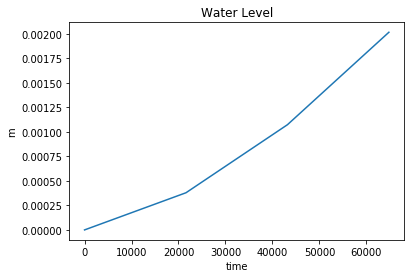

In [40]:
axs = plt.subplot()

axs.plot(x,y)
axs.set_title('Water Level')
axs.set_xlabel('time')
axs.set_ylabel('m')

plt.show()
#plot.set_titile('titulo')

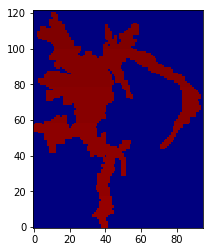

In [70]:
im2=plt.imshow(dataset.variables['XCOR'][:,:],\
             cmap= plt.get_cmap('jet'), aspect='equal', origin='lower')



In [71]:
aux=dataset.variables['XCOR'][:,:]

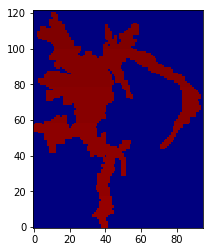

In [72]:
plt.imshow(aux[:,:],\
        cmap= plt.get_cmap('jet'), aspect='equal', origin='lower')

In [46]:
print(dataset.variables['RHO'][3,25,0,0])
print(dataset.variables['RHO'][3,25,30,75])

-999.0
-999.0


In [35]:
valores=[]
for n in dataset.variables['WPHY'][3,1,0,:]:
    if str(n) not in valores:
        valores= np.append(valores,str(n))
        
print(valores)

['-999.0']


In [13]:
#print(dataset.dimensions['RICH'])

KeyError: 'RICH'

In [16]:
len(dataset.variables)

45

In [17]:
lista=[[],[],[]]
for n in dataset.variables.keys():
    dimensiones=''
    for i in dataset.variables[n].dimensions:
        dimensiones= dimensiones+" "+i
    lista[0]= np.append(lista[0],n)
    lista[1]= np.append(lista[1],len(dataset.variables[n].dimensions))
    lista[2]= np.append(lista[2],dimensiones)
    

In [18]:
for i in range(len(lista[0])):
    print(lista[0][i],lista[1][i],lista[2][i])
    

XCOR 2.0  MC NC
YCOR 2.0  MC NC
XZ 2.0  M N
YZ 2.0  M N
ALFAS 2.0  M N
KCU 2.0  MC N
KCV 2.0  M NC
KCS 2.0  M N
DP0 2.0  M N
DPS0 2.0  M N
DPU0 2.0  MC N
DPV0 2.0  M NC
NAMCON 2.0  LSTSCI strlen20
NAMTUR 2.0  LTUR strlen20
ZK_LYR 1.0  K_LYR
ZK 1.0  K_INTF
GSQS 2.0  M N
PPARTITION 2.0  M N
KMAXOUT 1.0  KMAXOUT
KMAXOUT_RESTR 1.0  KMAXOUT_RESTR
RHOCONST 0.0 
GRAVITY 0.0 
grid 0.0 
time 1.0  time
S1 3.0  time M N
KFU 3.0  time MC N
KFV 3.0  time M NC
U1 4.0  time KMAXOUT_RESTR MC N
V1 4.0  time KMAXOUT_RESTR M NC
W 4.0  time KMAXOUT M N
WPHY 4.0  time KMAXOUT_RESTR M N
R1 5.0  time LSTSCI KMAXOUT_RESTR M N
RTUR1 5.0  time LTUR KMAXOUT M N
TAUKSI 3.0  time MC N
TAUETA 3.0  time M NC
TAUMAX 3.0  time M N
VICWW 4.0  time KMAXOUT M N
DICWW 4.0  time KMAXOUT M N
RICH 4.0  time KMAXOUT M N
RHO 4.0  time KMAXOUT_RESTR M N
UMNLDF 3.0  time MC N
VMNLDF 3.0  time M NC
VICUV 4.0  time KMAXOUT_RESTR M N
MNKSRC 3.0  time NSRC length_7
HYDPRES 4.0  time KMAXOUT_RESTR M N


In [19]:

for n in dataset.dimensions.keys():
    if n in dataset.variables.keys():
        print(dataset.variables[n])

<class 'netCDF4._netCDF4.Variable'>
int32 KMAXOUT(KMAXOUT)
    long_name: User selected output layer interfaces
    units: 1
    compress: ZK
unlimited dimensions: 
current shape = (36,)
filling on, default _FillValue of -2147483647 used

<class 'netCDF4._netCDF4.Variable'>
int32 KMAXOUT_RESTR(KMAXOUT_RESTR)
    long_name: User selected output layer centres
    units: 1
    compress: ZK_LYR
unlimited dimensions: 
current shape = (35,)
filling on, default _FillValue of -2147483647 used

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    units: seconds since 2018-08-04 00:00:00
    calendar: proleptic_gregorian
unlimited dimensions: time
current shape = (5,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [20]:
for i in range(len(lista[0])):
    print(lista[0][i],lista[1][i],lista[2][i])
    

XCOR 2.0  MC NC
YCOR 2.0  MC NC
XZ 2.0  M N
YZ 2.0  M N
ALFAS 2.0  M N
KCU 2.0  MC N
KCV 2.0  M NC
KCS 2.0  M N
DP0 2.0  M N
DPS0 2.0  M N
DPU0 2.0  MC N
DPV0 2.0  M NC
NAMCON 2.0  LSTSCI strlen20
NAMTUR 2.0  LTUR strlen20
ZK_LYR 1.0  K_LYR
ZK 1.0  K_INTF
GSQS 2.0  M N
PPARTITION 2.0  M N
KMAXOUT 1.0  KMAXOUT
KMAXOUT_RESTR 1.0  KMAXOUT_RESTR
RHOCONST 0.0 
GRAVITY 0.0 
grid 0.0 
time 1.0  time
S1 3.0  time M N
KFU 3.0  time MC N
KFV 3.0  time M NC
U1 4.0  time KMAXOUT_RESTR MC N
V1 4.0  time KMAXOUT_RESTR M NC
W 4.0  time KMAXOUT M N
WPHY 4.0  time KMAXOUT_RESTR M N
R1 5.0  time LSTSCI KMAXOUT_RESTR M N
RTUR1 5.0  time LTUR KMAXOUT M N
TAUKSI 3.0  time MC N
TAUETA 3.0  time M NC
TAUMAX 3.0  time M N
VICWW 4.0  time KMAXOUT M N
DICWW 4.0  time KMAXOUT M N
RICH 4.0  time KMAXOUT M N
RHO 4.0  time KMAXOUT_RESTR M N
UMNLDF 3.0  time MC N
VMNLDF 3.0  time M NC
VICUV 4.0  time KMAXOUT_RESTR M N
MNKSRC 3.0  time NSRC length_7
HYDPRES 4.0  time KMAXOUT_RESTR M N


In [21]:
dependencias=[]
for n in lista[2]:
    if n not in dependencias:
        dependencias= np.append(dependencias,n)
    

In [22]:
for n in range(len(dependencias)):
    print(dependencias[n])

 MC NC
 M N
 MC N
 M NC
 LSTSCI strlen20
 LTUR strlen20
 K_LYR
 K_INTF
 KMAXOUT
 KMAXOUT_RESTR

 time
 time M N
 time MC N
 time M NC
 time KMAXOUT_RESTR MC N
 time KMAXOUT_RESTR M NC
 time KMAXOUT M N
 time KMAXOUT_RESTR M N
 time LSTSCI KMAXOUT_RESTR M N
 time LTUR KMAXOUT M N
 time NSRC length_7


In [ ]:
print(dataset.variables['YCOR'])

In [ ]:
def interfaz_3_dim():
    #Dibujo un plot en función del tiempo de unas coordenadas dadas
    #Tengo que poder escoger las coordenadas x, y

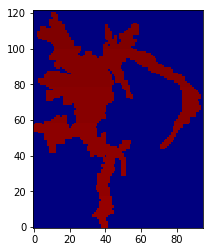

In [73]:
plt.imshow(aux[:,:],\
        cmap= plt.get_cmap('jet'), aspect='equal', origin='lower')

In [ ]:
slider_x = widgets.IntSlider(
    value=0,
    min=0,
    max=30,
    readout=True

)